In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt 
import mpmath
import timeit

sys.path.insert(0, os.path.abspath("."))
sys.path.append(os.path.abspath("./ZERN/"))

from zern.zern_core import Zernike
import numpy as np

sys.path.insert(0, os.path.abspath("."))
sys.path.append(os.path.abspath("./zernike/"))
from zernike import RZern

sys.path.insert(0, os.path.abspath("."))
sys.path.append(os.path.abspath("./zernpy/src/"))
from zernpy import ZernPol

from zernipax.basis import ZernikePolynomial
from zernipax.zernike import *
from zernipax.plotting import plot_comparison
from zernipax.backend import jax
from tqdm import tqdm

using JAX backend, jax version=0.4.28, jaxlib version=0.4.28, dtype=float64
Using device: CPU, with 11.06 GB available memory


In [2]:
res = 50
basis = ZernikePolynomial(L=res, M=res, spectral_indexing="ansi", sym="cos")
ms = basis.modes[:,1]
ns = basis.modes[:,0]
r = np.linspace(0, 1, 100)

In [3]:
def fun_prec(prec):
    mpmath.mp.dps = prec
    a = mpmath.mpf('1e-50')
    b = mpmath.mpf('5.2')
    return mpmath.fsub(b, a)

print(fun_prec(200))
print(5.2-1e-50)

5.19999999999999999999999999999999999999999999999999
5.2


In [4]:
mpmath.mp.dps = 54
print("Decimal places of precision (dps):", mpmath.mp.dps)
print("Bit precision (prec):", mpmath.mp.prec)

Decimal places of precision (dps): 54
Bit precision (prec): 183


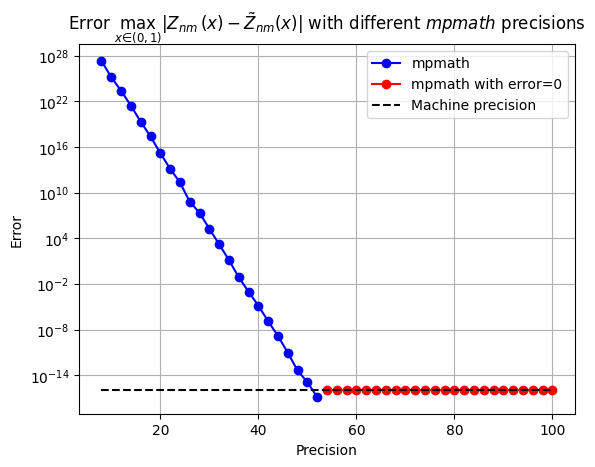

In [50]:
results = np.loadtxt("001_results_precision.txt")
precisions = results[:,0]
errors = results[:,1]
idx = np.argwhere(errors<1e-18)
ridx = np.argwhere(errors>1e-18)
# print(idx, ridx)
errors[idx] = 2**-53                                                 

title = "Error $\\max_{x \\in (0,1)} |Z_{nm}(x)-\\tilde{Z}_{nm}(x)|$ with different $mpmath$ precisions"

plt.semilogy(precisions[ridx], errors[ridx], "o-", color="blue", label="mpmath")
plt.semilogy(precisions[idx], errors[idx], "o-", color="red", label="mpmath with error=0")
plt.semilogy([8, 100], [2**-53, 2**-53], "--", color="black", label="Machine precision")
# plt.text(10, 2**-50, "64-bit Machine Precision", color="black")
plt.grid()
plt.legend()
plt.xlabel("Precision")
plt.ylabel("Error")
plt.title(title)
plt.savefig("precision_comparision.png", dpi=1000)

In [18]:
bitwise = []

for prec in precisions:
    mpmath.mp.dps = prec
    bitwise.append(mpmath.mp.prec)

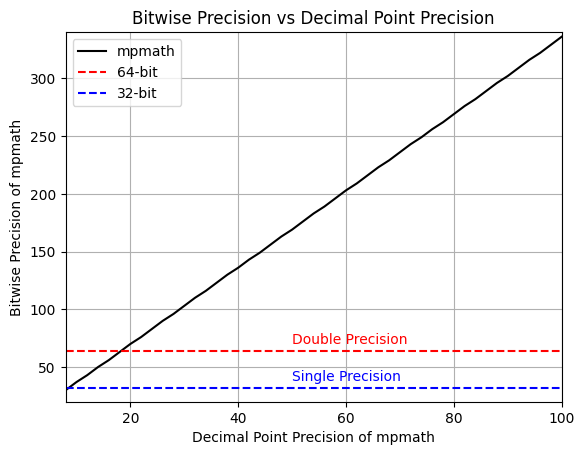

In [32]:
plt.plot(precisions, bitwise, color="black", label="mpmath")
plt.plot([8, 100], [64, 64], "--", color="red", label="64-bit")
plt.plot([8, 100], [32, 32], "--", color="blue", label="32-bit")
plt.text(50, 70, "Double Precision", color="red")
plt.text(50, 38, "Single Precision", color="blue")
plt.legend()
plt.xlim(8, 100)
plt.ylim(20, 340)
plt.grid()
plt.xlabel("Decimal Point Precision of mpmath")
plt.ylabel("Bitwise Precision of mpmath")
plt.title("Bitwise Precision vs Decimal Point Precision")
plt.savefig("bitwise_precision.png", dpi=1000)

In [226]:
def fun(r, n, m):
    return zernike_radial(r, n, m)

def fun2(r, n, m):
    return zernike_radial_old_desc(r[:, np.newaxis], n, m)

res = 100
basis = ZernikePolynomial(L=res, M=res, spectral_indexing="ansi")
ms = basis.modes[:,1]
ns = basis.modes[:,0]
r = np.linspace(0, 1, 100)
# ns = 200
# ms = 10

print(timeit.timeit(lambda: fun(r, ns, ms), number=1000))
print(timeit.timeit(lambda: fun2(r, ns, ms), number=1000))

24.185807461999502
47.07903968199935


In [224]:
jax.clear_caches()